# Symmetry Diagrams

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def paperFigureSettings():
    mpl.rcParams['text.usetex'] = True
    mpl.rcParams['font.family'] = 'sans-serif'
    mpl.rcParams['font.sans-serif'] = ['stixsans']
    mpl.rcParams['font.size'] = 7
    mpl.rcParams['text.latex.preamble'] = r'\usepackage[eulergreek]{sansmath}\sansmath\usepackage{amsmath}'


In [3]:
def set_axes_equal(ax):
    '''Make axes of 3D plot have equal scale so that spheres appear as spheres,
    cubes as cubes, etc..  This is one possible solution to Matplotlib's
    ax.set_aspect('equal') and ax.axis('equal') not working for 3D.

    Input
      ax: a matplotlib axis, e.g., as output from plt.gca().
    '''
    # from https://stackoverflow.com/questions/13685386/matplotlib-equal-unit-length-with-equal-aspect-ratio-z-axis-is-not-equal-to

    x_limits = ax.get_xlim3d()
    y_limits = ax.get_ylim3d()
    z_limits = ax.get_zlim3d()

    x_range = abs(x_limits[1] - x_limits[0])
    x_middle = np.mean(x_limits)
    y_range = abs(y_limits[1] - y_limits[0])
    y_middle = np.mean(y_limits)
    z_range = abs(z_limits[1] - z_limits[0])
    z_middle = np.mean(z_limits)

    # The plot bounding box is a sphere in the sense of the infinity
    # norm, hence I call half the max range the plot radius.
    plot_radius = 0.5*max([x_range, y_range, z_range])

    ax.set_xlim3d([x_middle - plot_radius, x_middle + plot_radius])
    ax.set_ylim3d([y_middle - plot_radius, y_middle + plot_radius])
    ax.set_zlim3d([z_middle - plot_radius, z_middle + plot_radius])

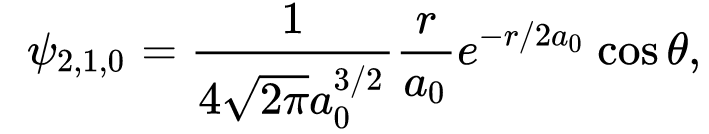

$$
r e^{-r/2} \cos(\theta)=A
$$

In [4]:
import sympy as sp

In [5]:
r, a = sp.symbols('r, a')
sp.solve(r*sp.exp(-r/2)-a,r)

[-2*LambertW(-a/2), -2*LambertW(a/2)]

In [6]:
rvals*np.exp(-rvals/2)*np.cos(theta)

NameError: name 'rvals' is not defined

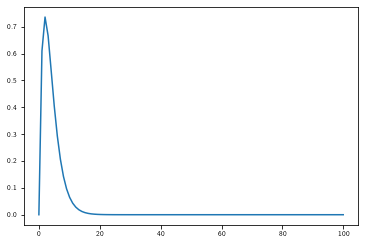

In [76]:
fig, ax = plt.subplots()
ax.plot(rvals, rvals*np.exp(-rvals/2)*np.cos(theta))

1
1
1


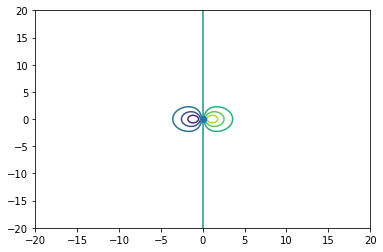

In [8]:
Delta  =  0.025 
X  =  np.arange ( - 4.0 ,  4.0 ,  Delta ) 
Y  =  np.arange ( - 3.0 ,  3.0 ,  Delta )

X, Y = np.meshgrid ( x ,  y ) 
Zpx  =  X /np.sqrt ( X ** 2  +  Y ** 2 ) * np.sqrt ( X ** 2  +  Y ** 2 ) * np.exp( - np.sqrt ( X ** 2  +  Y ** 2 ))
# Azimuthal function × radial function
fig, ax = plt.subplots () 
print('1')
CS = ax.contour( X , Y , Zpx ) 
print('1')
#ax.clabel ( CS , inline = 1 , fontsize = 10 ) 
ax.plot ([ 0 , 0 ], [ 0 , 0 ], "o" ) # nucleus position
print('1')

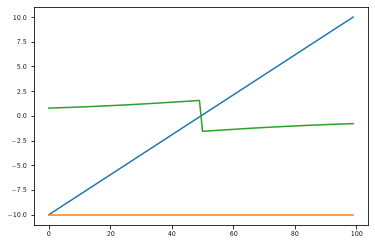

In [127]:
plt.plot(X[0])
plt.plot(Y[0])
plt.plot(thetav[0])

In [9]:
import cmasher as cmr

In [10]:
mpl.rcParams['figure.dpi']=600

(-16.0, 16.0)

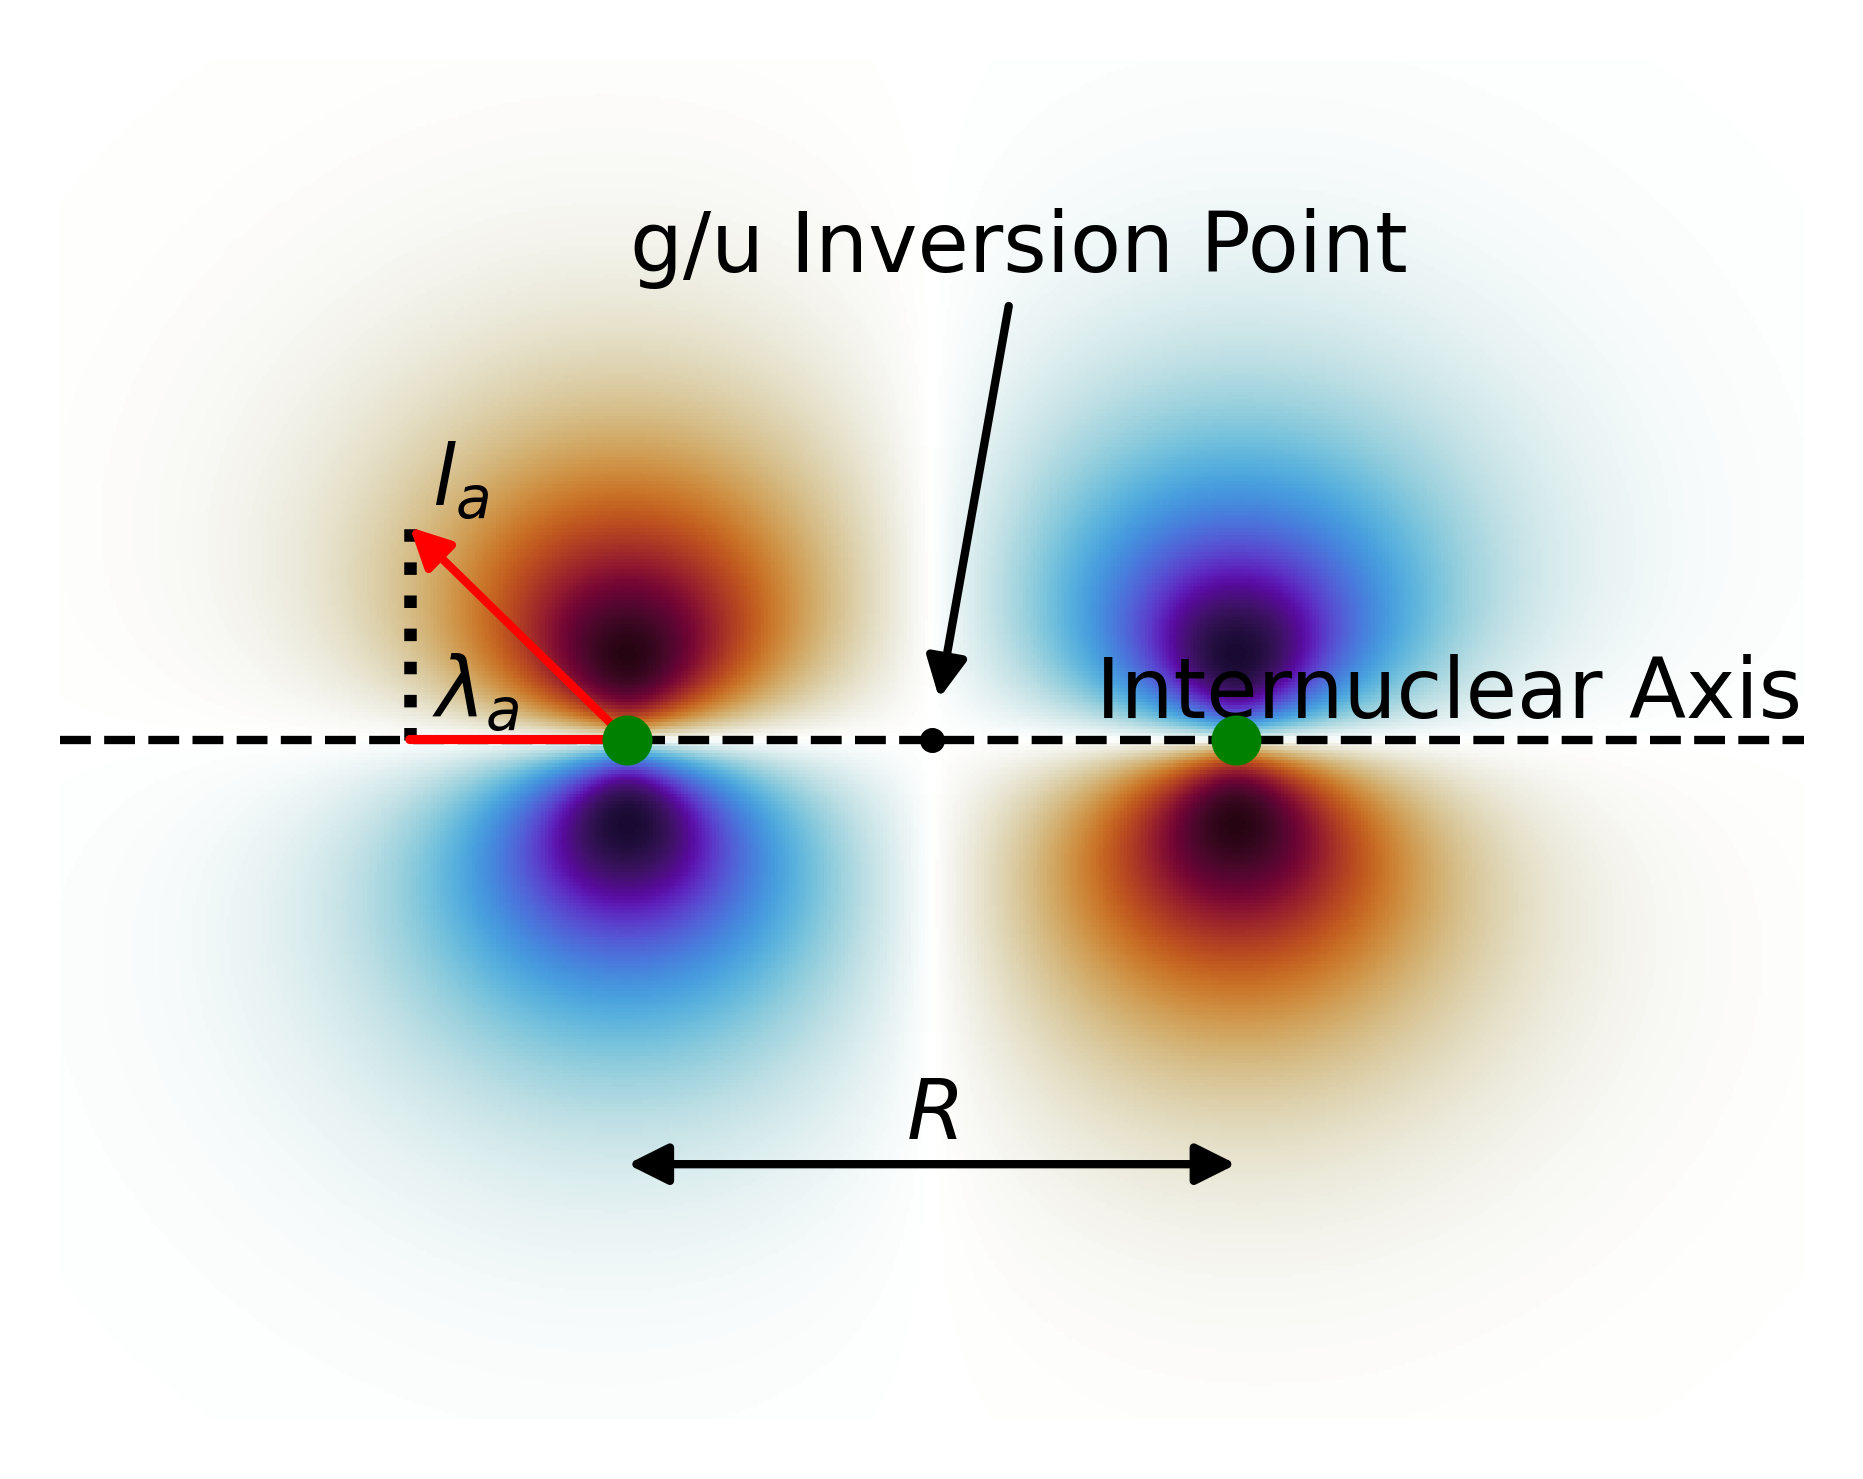

In [11]:
ratio = 1.25
sz = 20

fig, ax = plt.subplots(figsize=(ratio*3,3))

x = y = np.linspace(-sz, sz, 500)
X, Y = np.meshgrid(x,y)

def getPState(X,Y,x0):
    rv = np.sqrt((X-x0)**2+Y**2)
    thetav = np.arctan2(Y,(X-x0))
    return rv*np.exp(-rv/2)*np.sin(thetav)

atomLoc=7
Z = getPState(X,Y,atomLoc) - getPState(X,Y,-atomLoc)

ax.pcolormesh(X,Y,Z, cmap=cmr.fusion)
ax.axhline(0,ls='--', lw=1, color='k')

ax.plot( [0], [0], 'ok',ms=2)
ax.annotate('g/u Inversion Point', xy=(0,0), xytext=(2, sz/ratio-5), 
            arrowprops=dict(arrowstyle='-|>',color='k', lw=1, shrinkA=0,shrinkB=5), ha='center' )

Llength = 5
ax.annotate('', xy=(-atomLoc-Llength,Llength), xytext=(-atomLoc, 0), 
            arrowprops=dict(arrowstyle='-|>',color='r', lw=1, shrinkA=0,shrinkB=0), ha='center' )
ax.text(-atomLoc-Llength+0.5,Llength+0.5,r'$l_a$')
ax.annotate( '', xy=(-atomLoc-Llength,0), xytext=(-atomLoc, 0), 
             arrowprops=dict(arrowstyle='-',color='r', lw=1.1, shrinkA=0,shrinkB=0), ha='center' )
ax.text(-atomLoc-Llength+0.5,0.5,r'$\lambda_a$')
ax.plot([-atomLoc-Llength,-atomLoc-Llength],[0,Llength],ls=':', color='k')

ax.text(sz, 0.5, 'Internuclear Axis',ha='right')

ax.annotate(r'', xy=(atomLoc,-10), xytext=(-atomLoc, -10), 
            arrowprops=dict(arrowstyle='<|-|>',
                            color='k', lw=1, shrinkA=0,shrinkB=0) )
ax.text(0,-9.8,r'$R$',va='bottom', ha='center')
#ax.axvline(0,ls='--', lw=1, color='k')
#ax.text(1, sz/ratio-2, 'kronig Inversion Plane')

ax.plot([-atomLoc,atomLoc],[0,0],ls='',marker='o',color='g',ms=5, zorder=5)
ax.axis('off')
ax.set_ylim(-sz/ratio,sz/ratio)

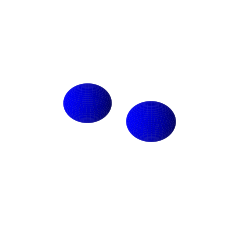

In [28]:
paperFigureSettings()
fig = plt.figure()
ax = fig.add_subplot( projection='3d' )

u, v = np.mgrid[0:2*np.pi:120j, 0:np.pi:60j]
x = np.cos(u)*np.sin(v)
y = np.sin(u)*np.sin(v)
z = np.cos(v)

ax.plot_surface( x,y,z, alpha=1, color='b')
ax.plot_surface( x+3,y,z, alpha=1, color='b')
ax.axis(False)
set_axes_equal(ax)
